In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Gwanak_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [4]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A15106001,1162010100,277,19990511.0,개별난방,아파트,단일계약,6.0,39.0,100.0
1,A15192201,1162010100,487,20040528.0,개별난방,아파트,단일계약,34.0,96.0,428.0
2,A15181602,1162010100,251,19880311.0,개별난방,아파트,단일계약,5.0,224.0,0.0
3,A15178203,1162010100,560,20001228.0,개별난방,아파트,단일계약,5.0,42.0,222.0
4,A15105302,1162010100,2104,20040826.0,개별난방,아파트,단일계약,36.0,120.0,1990.0
...,...,...,...,...,...,...,...,...,...,...
66,A10024749,1162010200,126,19980601.0,개별난방,아파트,단일계약,3.0,1.0,140.0
67,A10024634,1162010200,109,20030902.0,개별난방,아파트,NaN,NaN,NaN,NaN
68,A15108003,1162010300,174,20041229.0,개별난방,아파트,단일계약,9.0,27.0,159.0
69,A15108001,1162010300,170,20050330.0,개별난방,아파트,종합계약,9.0,38.0,170.0


In [5]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          2
Elev_Num          2
Park_Above        2
Park_Below        2
dtype: int64

<AxesSubplot: >

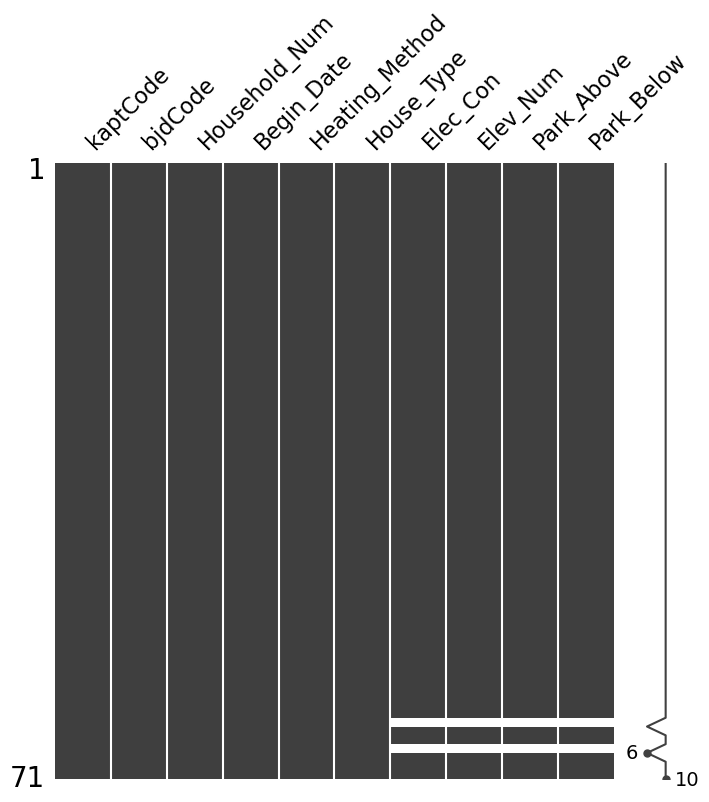

In [6]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [7]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [8]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0    1999-05-11
1    2004-05-28
2    1988-03-11
3    2000-12-28
4    2004-08-26
        ...    
66   1998-06-01
67   2003-09-02
68   2004-12-29
69   2005-03-30
70   2003-06-28
Name: Begin_Date, Length: 71, dtype: datetime64[ns]


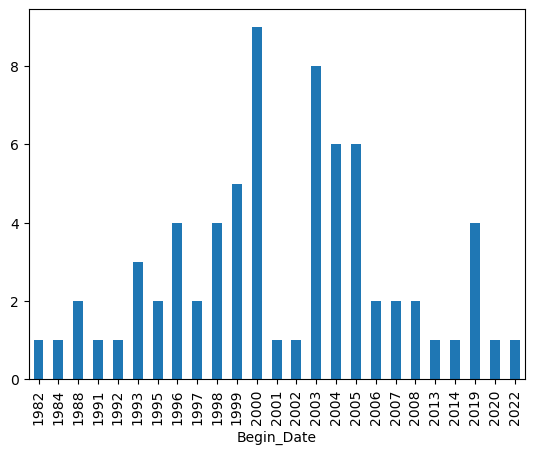

In [9]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

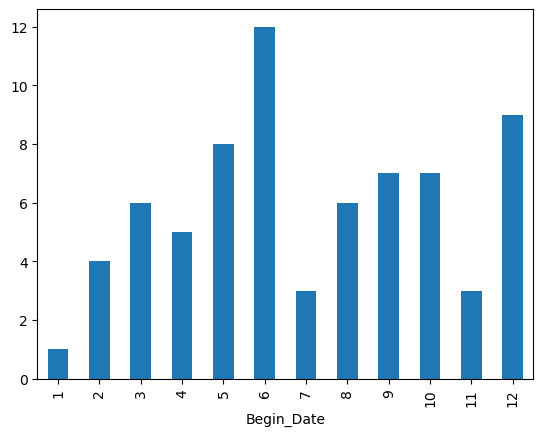

In [10]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [11]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      277
1      487
2      251
3      560
4     2104
      ... 
66     126
67     109
68     174
69     170
70      88
Name: Household_Num, Length: 71, dtype: int64

In [12]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

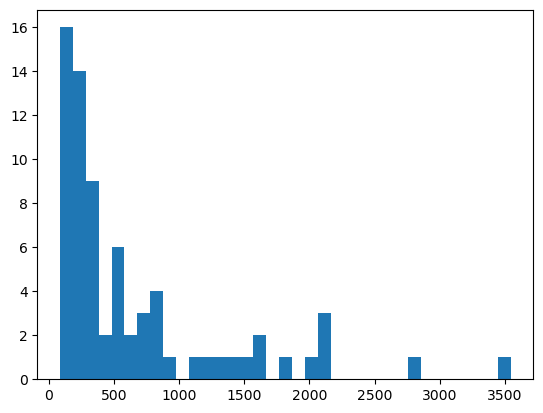

In [13]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [14]:
Household_Num.describe()

count      71.000000
mean      656.971831
std       704.282775
min        88.000000
25%       202.000000
50%       363.000000
75%       791.000000
max      3544.000000
Name: Household_Num, dtype: float64

In [15]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [16]:
printApt(Household_Num, df, dfInfo)

kaptCode           A15180705
bjdCode           1162010100
Household_Num           3544
Begin_Date        20030906.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                92.0
Park_Above             975.0
Park_Below            4429.0
Name: 8, dtype: object
    kaptCode Complex_Name
8  A15180705       관악드림타운


## Heating_Method

In [17]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0     개별난방
1     개별난방
2     개별난방
3     개별난방
4     개별난방
      ... 
66    개별난방
67    개별난방
68    개별난방
69    개별난방
70    개별난방
Name: Heating_Method, Length: 71, dtype: object

In [18]:
Heating_Method = Heating_Method.dropna()

In [22]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Index(['개별난방', '중앙난방'], dtype='object')


In [23]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    68
1     3
dtype: int64

In [24]:
eng_ind_HM = ['Individual','Central']

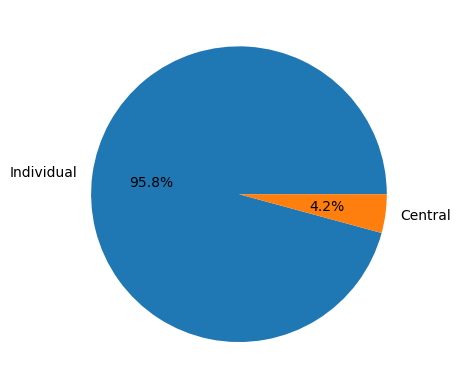

In [25]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [26]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 2 null values, and they are located at 
[64 67]


In [27]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

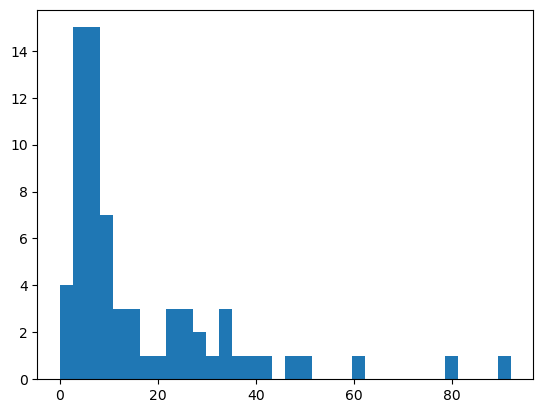

In [28]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [29]:
Elev_Num.describe()

count    69.000000
mean     16.434783
std      18.064002
min       0.000000
25%       5.000000
50%       9.000000
75%      24.000000
max      92.000000
Name: Elev_Num, dtype: float64

In [30]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A15180705
bjdCode           1162010100
Household_Num           3544
Begin_Date        20030906.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                92.0
Park_Above             975.0
Park_Below            4429.0
Name: 8, dtype: object
    kaptCode Complex_Name
8  A15180705       관악드림타운


## Electricity Contract; Elec_Con

In [31]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 2 null values, and they are located at 
[64 67]


In [32]:
Elec_Con = Elec_Con.dropna()

In [33]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 1 0]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [34]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    47
1    21
2     1
dtype: int64

In [35]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

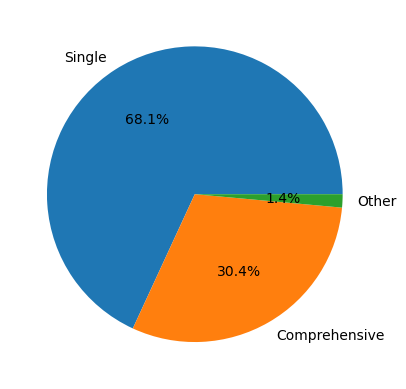

In [36]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [37]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 2 null values, and they are located at 
[64 67]
There are 2 null values, and they are located at 
[64 67]


In [38]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0      39
1      96
2     224
3      42
4     120
     ... 
65      0
66      1
68     27
69     38
70     39
Name: Park_Above, Length: 69, dtype: int16

0      100
1      428
2        0
3      222
4     1990
      ... 
65    1303
66     140
68     159
69     170
70      73
Name: Park_Below, Length: 69, dtype: int16

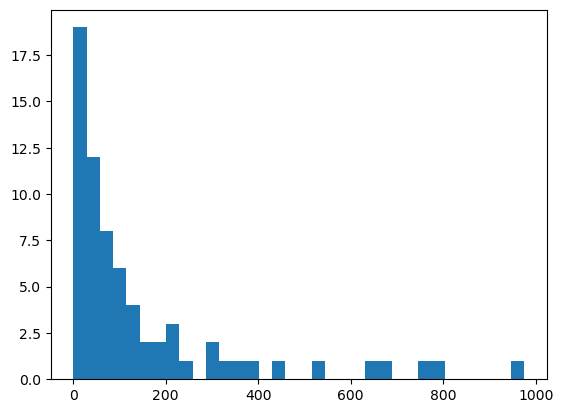

In [39]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

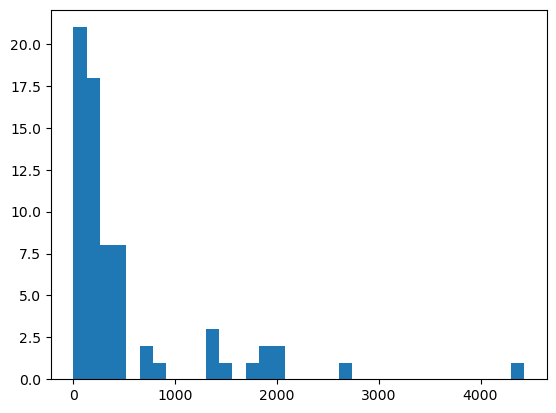

In [40]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [41]:
Park_Above.describe()

count     69.000000
mean     150.478261
std      210.234366
min        0.000000
25%       26.000000
50%       70.000000
75%      176.000000
max      975.000000
Name: Park_Above, dtype: float64

In [42]:
Park_Below.describe()

count      69.000000
mean      510.028986
std       763.077804
min         0.000000
25%        98.000000
50%       218.000000
75%       437.000000
max      4429.000000
Name: Park_Below, dtype: float64

In [43]:
printApt(Park_Above, df, dfInfo)

kaptCode           A15180705
bjdCode           1162010100
Household_Num           3544
Begin_Date        20030906.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                92.0
Park_Above             975.0
Park_Below            4429.0
Name: 8, dtype: object
    kaptCode Complex_Name
8  A15180705       관악드림타운


In [44]:
printApt(Park_Below, df, dfInfo)

kaptCode           A15180705
bjdCode           1162010100
Household_Num           3544
Begin_Date        20030906.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                92.0
Park_Above             975.0
Park_Below            4429.0
Name: 8, dtype: object
    kaptCode Complex_Name
8  A15180705       관악드림타운
